<img src="https://github.com/Rogerio-mack/IMT_CD_2024/blob/main/maua_logo.png?raw=true" width=300, align="right">



# **Case**: Covid $\times$ B3, *Exploratory Data Analysis (EDA)*

* **Objetivo da atividade:** O objetivo deste exercício é uma realizar uma análise exploratória focada na **evolução** da pandemia de Covid-19 e de ativos da Bolsa Brasileira (B3) de Fev de 2020 até a data atual (Abr 2024).

* **Atividade em grupo:** min 2 máx 5 alunos

* **Entregáveis**

  * Notebook Python (.ipynb), 100% executável, contendo códigos, gráficos e as conclusões da análise.

* **Requisitos mínimos**

  * Os ativos da bolsa (mínimo 2) são de livre escolha do grupo, bem como os indicadores que serão empregados, tanto da bolsa como da Covid.
  * A análise deve cobrir todo o período de Fev 2020 ao atual (Abr 2024)
  * A análise deve incluir ao menos um gráfico. Além dos elementos obrigatórios, como títulos e rótulos, os seguintes recursos devem obrigatoriamente ser empregados:

    * Anotações, linhas indicativas de pontos de interesse/análise, sobreamento faixas (opcional)
    * Uma ou mais linhas de tendências
    * Uma ou mais linhas de valores médios

  * Ao final, análise deve destacar ao menos 2 pontos de interesse e suas conclusões.

* **Fonte dos Dados**

  * **Covid**

    * https://covid.saude.gov.br/

    * Alternativamente (dados até 06.04.2024)
https://drive.google.com/drive/folders/1JBd2lb1l40a5J2YHtQ6tsq9pNFA-Rl7U?usp=sharing

  * **Ativos B3**

    * Empregue: https://pypi.org/project/yfinance/

    * Ativos da B3: https://www.b3.com.br/pt_br/produtos-e-servicos/negociacao/renda-variavel/empresas-listadas.htm

* **Complementar (+5,0):** Análises complementares com outros dados podem ser incluídas opcionalmente com até +5,0 adicionais na atividade.

  * Dados Complementares de Saúde https://opendatasus.saude.gov.br/  
  > Dados sobre síndrome gripal, ocupação hospitalar, vacinação, síndrome respiratória aguda (SRAG), dados demográficos etc.
  >
  > Para outros dados, consulte o professor.

* **Recomendações**

1. Os dados de Covid precisam ser baixados e compartilhados, por exemplo em um Drive.
2. Os dados de Covid encontram-se zipados. Empregue `import zipfile` e acesse os dados diretamente dos arquivos compactados.
3. Normalize os dados ou empregue `ax.twinx()` para apresentação de dados em diferentes escalas.

<br>
<br>

---



# **Exploratory Data Analysis (EDA)**
## Análise de Ativos da Bolsa Brasileira de Empresas entre 2020-2024

In [ ]:
#@title **Identificação do Grupo**

#@markdown Nomes completos em ordem alfabética (*\<nome\>, \<RA\>*)
Aluno1 = 'Johannes Mattheus Krouwel, 20.01248-9' #@param {type:"string"}
Aluno2 = 'Kaique de Andrade Almeida, 17.01113-2' #@param {type:"string"}
Aluno3 = 'Filipe dos Santos Pugliesi, 18.02608-7' #@param {type:"string"}
Aluno4 = 'Marcel Marques Caceres, 17.00648-0' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}

# **Introdução**

*O propósito dessa análise é observar como os ativos da bolsa brasileira da LOG-IN Logística Modal e as Linhas Aéreas Gol foram afetadas pela pandemia COVID e o período posterior. Espera-se que maior parte das empresas do mundo, especialmente uma de transporte como a Gol, teriam sofrido economicamente durante a pandemia, porém também é necessário saber o quanto conseguiram se recuperar.*

*Além disso, também foram analisados os dados de Síndrome Respiratória Aguda Grave entre 2021 e 2023 disponíveis em https://opendatasus.saude.gov.br/ para ver se houve alguma correlação entre os dados anteriores durante da segunda metade da pandemia e o ano depois de tal terminar. Infelizmente dados de 2020 e 2024 não estavam disponíveis*.

# **Resultados**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import zipfile


zip_path = '/content/drive/MyDrive/HIST_PAINEL_COVIDBR_06abr2024.zip'

df_total = pd.DataFrame()

# Abrir o arquivo ZIP
with zipfile.ZipFile(zip_path, 'r') as z:
    print(z.namelist())

with zipfile.ZipFile(zip_path, 'r') as z:
    for filename in z.namelist():
        if filename.endswith('.csv'):
            try:
                with z.open(filename) as f:
                    df = pd.read_csv(f, sep=';', on_bad_lines='skip')
                    # print(df.head())
                    df_total = pd.concat([df_total,df], ignore_index=True)
            except Exception as e:
                print(f"Erro ao ler {filename}: {e}")



['HIST_PAINEL_COVIDBR_2020_Parte1_06abr2024.csv', 'HIST_PAINEL_COVIDBR_2020_Parte2_06abr2024.csv', 'HIST_PAINEL_COVIDBR_2021_Parte1_06abr2024.csv', 'HIST_PAINEL_COVIDBR_2021_Parte2_06abr2024.csv', 'HIST_PAINEL_COVIDBR_2022_Parte1_06abr2024.csv', 'HIST_PAINEL_COVIDBR_2022_Parte2_06abr2024.csv', 'HIST_PAINEL_COVIDBR_2023_Parte1_06abr2024.csv', 'HIST_PAINEL_COVIDBR_2023_Parte2_06abr2024.csv', 'HIST_PAINEL_COVIDBR_2024_Parte1_06abr2024.csv']


In [ ]:
 df_total.data.min(), df_total.data.max()

('2020-02-25', '2024-04-06')

In [ ]:
pip install yfinance --upgrade --no-cache-dir

In [ ]:
import yfinance as yf

tickers = ['GOLL4.SA', 'LOGN3.SA']
data = yf.download(tickers, start='2020-02-25', end='2024-04-06')

[*********************100%%**********************]  2 of 2 completed


In [ ]:
df_total[df_total.regiao == 'Brasil']['data']

0          2020-02-25
1          2020-02-26
2          2020-02-27
3          2020-02-28
4          2020-02-29
              ...    
7727085    2024-04-02
7727086    2024-04-03
7727087    2024-04-04
7727088    2024-04-05
7727089    2024-04-06
Name: data, Length: 1503, dtype: object

In [ ]:
import matplotlib.dates as mdates
import datetime as dt

#dates = df_total[df_total.regiao == 'Brasil']['data']
#x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]

In [ ]:
df_total['data'] = pd.to_datetime(df_total['data'])

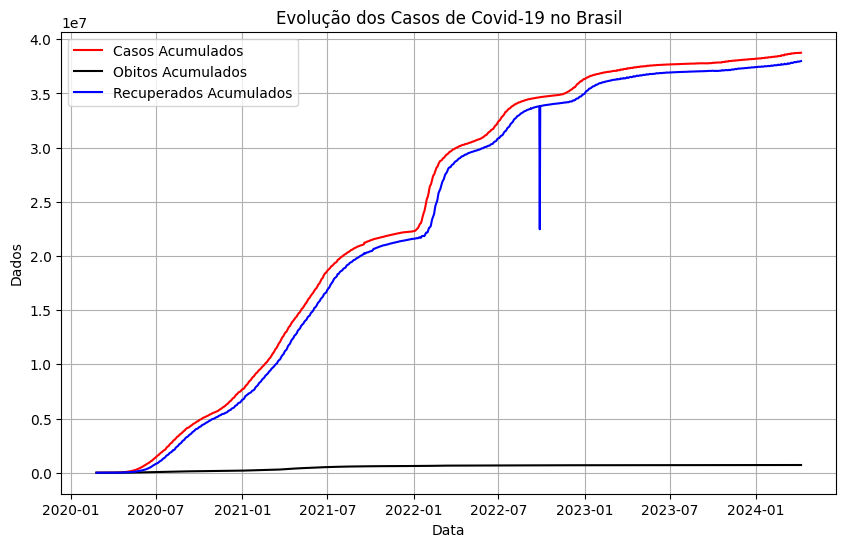

In [ ]:
# Análise exploratória dos dados da Covid-19
# Número de casos ao longo do tempo
plt.figure(figsize=(10, 6))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(df_total[df_total.regiao == 'Brasil']['data'], df_total[df_total.regiao == 'Brasil']['casosAcumulado'], label='Casos Acumulados', color = 'red')
plt.plot(df_total[df_total.regiao == 'Brasil']['data'], df_total[df_total.regiao == 'Brasil']['obitosAcumulado'], label='Obitos Acumulados', color = 'black')
plt.plot(df_total[df_total.regiao == 'Brasil']['data'], df_total[df_total.regiao == 'Brasil']['Recuperadosnovos'], label='Recuperados Acumulados', color = 'blue')
#plt.gcf().autofmt_xdate()
plt.xlabel('Data')
plt.ylabel('Dados')
plt.title('Evolução dos Casos de Covid-19 no Brasil')
plt.legend()
plt.grid(True)
plt.show()

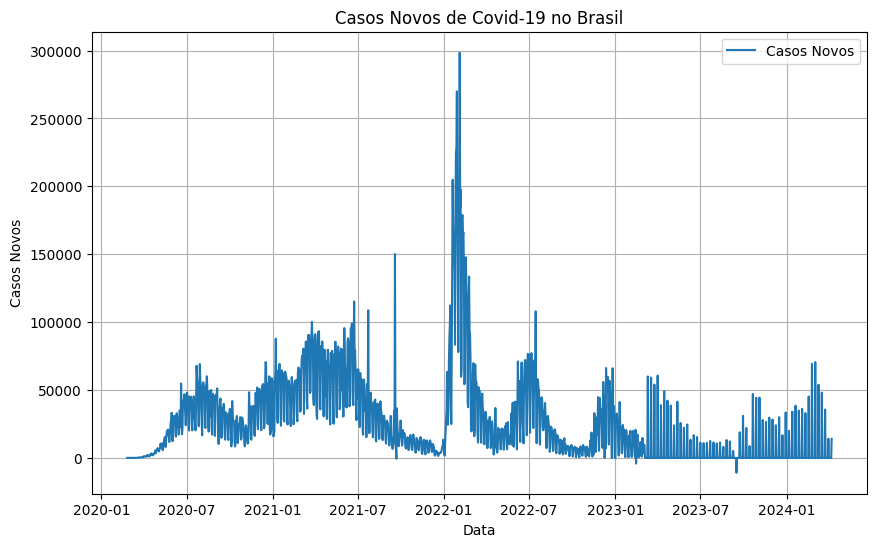

In [ ]:
# Casos Novos pelo Brasil x Data
plt.figure(figsize=(10, 6))
plt.plot(df_total[df_total.regiao == 'Brasil']['data'], df_total[df_total.regiao == 'Brasil']['casosNovos'], label='Casos Novos')
plt.xlabel('Data')
plt.ylabel('Casos Novos')
plt.title('Casos Novos de Covid-19 no Brasil')
plt.legend()
plt.grid(True)
plt.show()

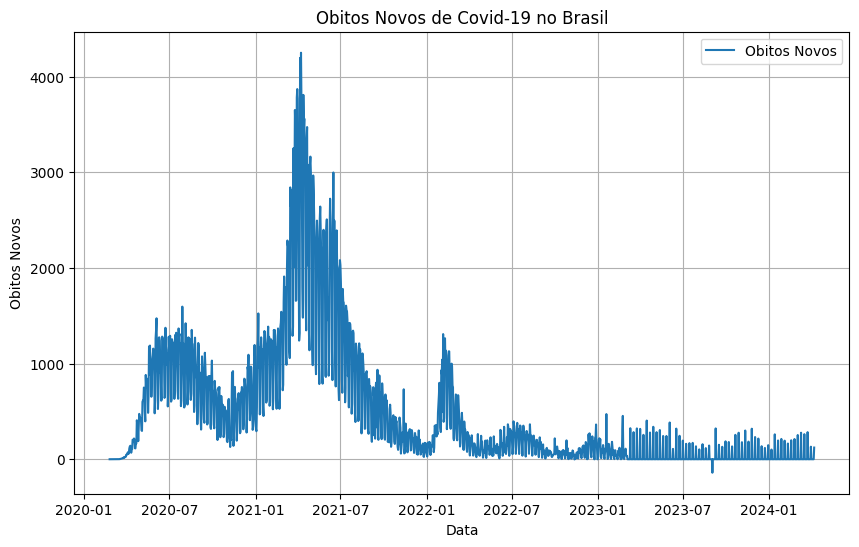

In [ ]:
# Obitos Novos pelo Brasil x Data
plt.figure(figsize=(10, 6))
plt.plot(df_total[df_total.regiao == 'Brasil']['data'], df_total[df_total.regiao == 'Brasil']['obitosNovos'], label='Obitos Novos')
plt.xlabel('Data')
plt.ylabel('Obitos Novos')
plt.title('Obitos Novos de Covid-19 no Brasil')
plt.legend()
plt.grid(True)
plt.show()

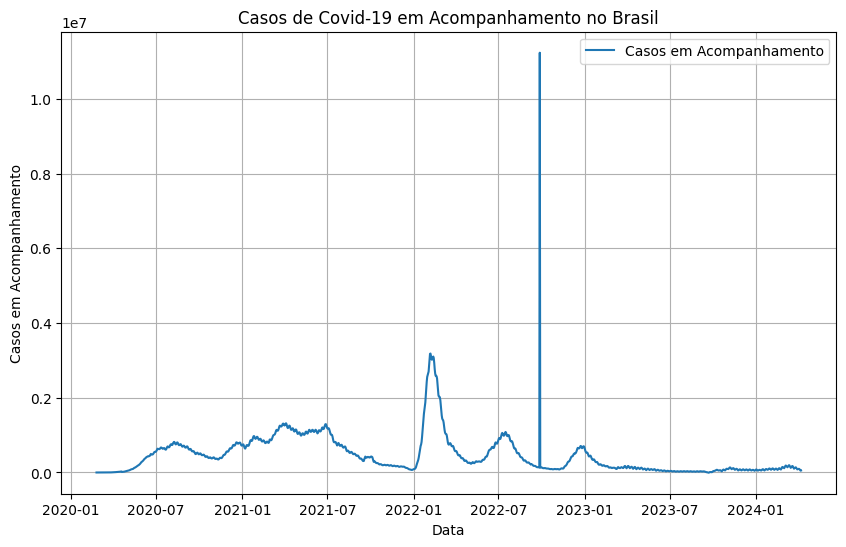

In [ ]:
# Casos em Acompanhamento pelo Brasil x Data
plt.figure(figsize=(10, 6))
plt.plot(df_total[df_total.regiao == 'Brasil']['data'], df_total[df_total.regiao == 'Brasil']['emAcompanhamentoNovos'], label='Casos em Acompanhamento')
plt.xlabel('Data')
plt.ylabel('Casos em Acompanhamento')
plt.title('Casos de Covid-19 em Acompanhamento no Brasil')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
pip install scikit-learn

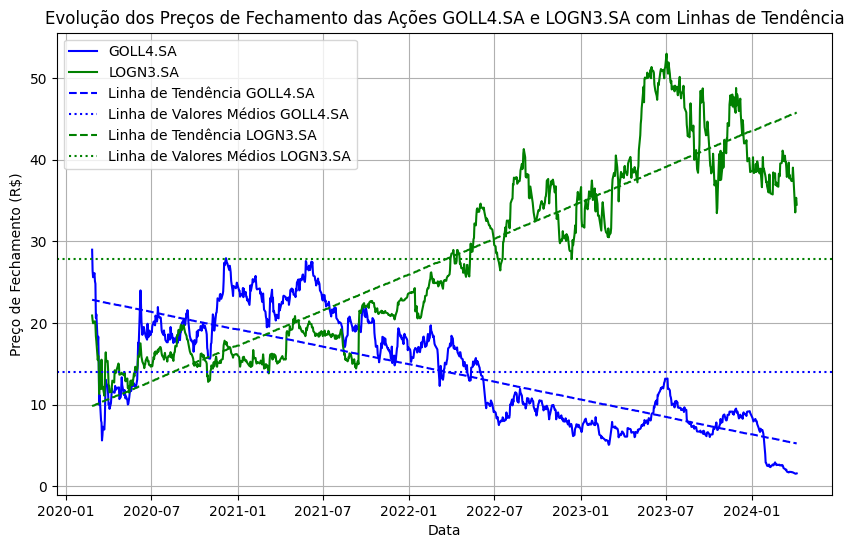

In [ ]:
# Análise exploratória dos dados dos ativos da B3
# Preço de fechamento das ações ao longo do tempo
#data['Adj Close'].plot(figsize=(10, 6))
#plt.xlabel('Data')
#plt.ylabel('Preço de Fechamento em R$')
#plt.title('Evolução dos Preços de Fechamento das Ações')
#plt.grid(True)
#plt.show()



data.index = pd.to_datetime(data.index)

# Plotar o gráfico de linha dos preços de fechamento
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Adj Close']['GOLL4.SA'], label='GOLL4.SA', color='blue')
plt.plot(data.index, data['Adj Close']['LOGN3.SA'], label='LOGN3.SA', color='green')

# Calcular a linha de tendência para GOLL4.SA
x = np.arange(len(data))
y1 = data['Adj Close']['GOLL4.SA']
m1, b1 = np.polyfit(x, y1, 1)
plt.plot(data.index, m1*x + b1, linestyle='--', color='blue', label='Linha de Tendência GOLL4.SA')

# Calcular a linha de média dos valores para GOLL4.SA

plt.axhline(y=data['Adj Close']['GOLL4.SA'].mean(), color='blue', linestyle=':', label='Linha de Valores Médios GOLL4.SA')

# Calcular a linha de tendência para LOGN3.SA
y2 = data['Adj Close']['LOGN3.SA']
m2, b2 = np.polyfit(x, y2, 1)
plt.plot(data.index, m2*x + b2, linestyle='--', color='green', label='Linha de Tendência LOGN3.SA')

# Calcular a linha de média dos valores para LOGN3.SA

plt.axhline(y=data['Adj Close']['LOGN3.SA'].mean(), color='green', linestyle=':', label='Linha de Valores Médios LOGN3.SA')

# Gráfico para GOLL4.SA e LOGN3.SA

plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (R$)')
plt.title('Evolução dos Preços de Fechamento das Ações GOLL4.SA e LOGN3.SA com Linhas de Tendência')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Análise de Síndrome Respiratória Aguda Grave

zip_path = '/content/drive/MyDrive/INFLUD_Covid.zip'

df_influd = pd.DataFrame()

with zipfile.ZipFile(zip_path, 'r') as z:
    print(z.namelist())

with zipfile.ZipFile(zip_path, 'r') as z:
    for filename in z.namelist():
        if filename.endswith('.csv'):
            try:
                with z.open(filename) as f:
                    df = pd.read_csv(f, sep=';', on_bad_lines='skip')
                    df_influd = pd.concat([df_influd,df], ignore_index=True)
            except Exception as e:
                print(f"Erro ao ler {filename}: {e}")

['INFLUD_Covid/INFLUD21-01-05-2023.csv', 'INFLUD_Covid/INFLUD22-03-04-2023.csv', 'INFLUD_Covid/INFLUD23-27-05-2024.csv']


<ipython-input-15-3b30f4c53f7c>:15: DtypeWarning: Columns (15,59,61,62,63,91,93,105,107,114,116,117,118,122,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, sep=';', on_bad_lines='skip')
<ipython-input-15-3b30f4c53f7c>:15: DtypeWarning: Columns (15,53,59,61,62,63,91,93,120,122,143,171) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, sep=';', on_bad_lines='skip')
<ipython-input-15-3b30f4c53f7c>:15: DtypeWarning: Columns (15,18,20,23,53,61,62,63,72,74,79,91,93,109,120,121,130,143,171,175,176,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, sep=';', on_bad_lines='skip')


In [ ]:
df_influd['DT_SIN_PRI'] = pd.to_datetime(df_influd['DT_SIN_PRI'],dayfirst=True)

In [ ]:
counts = df_influd[df_influd.VACINA_COV == 1].groupby('DT_SIN_PRI').VACINA_COV.value_counts().reset_index().rename(columns={"index": "data", 0: "count"})
print(counts)

     DT_SIN_PRI  VACINA_COV  count
0    2021-01-03         1.0    303
1    2021-01-04         1.0    312
2    2021-01-05         1.0    313
3    2021-01-06         1.0    222
4    2021-01-07         1.0    252
...         ...         ...    ...
1087 2023-12-26         1.0    256
1088 2023-12-27         1.0    242
1089 2023-12-28         1.0    221
1090 2023-12-29         1.0    198
1091 2023-12-30         1.0    198

[1092 rows x 3 columns]


In [ ]:
counts['count']

0       303
1       312
2       313
3       222
4       252
       ... 
1087    256
1088    242
1089    221
1090    198
1091    198
Name: count, Length: 1092, dtype: int64

In [ ]:
df_hist = pd.DataFrame()
df_hist['Data'] = pd.date_range(start='1/3/2021', end='12/31/2023')
#'2021-01-01':'2023-12-31'
df_hist['Num_Vacinados'] = counts['count']
df_hist.head()


,Data,Num_Vacinados
0,2021-01-03,303.0
1,2021-01-04,312.0
2,2021-01-05,313.0
3,2021-01-06,222.0
4,2021-01-07,252.0


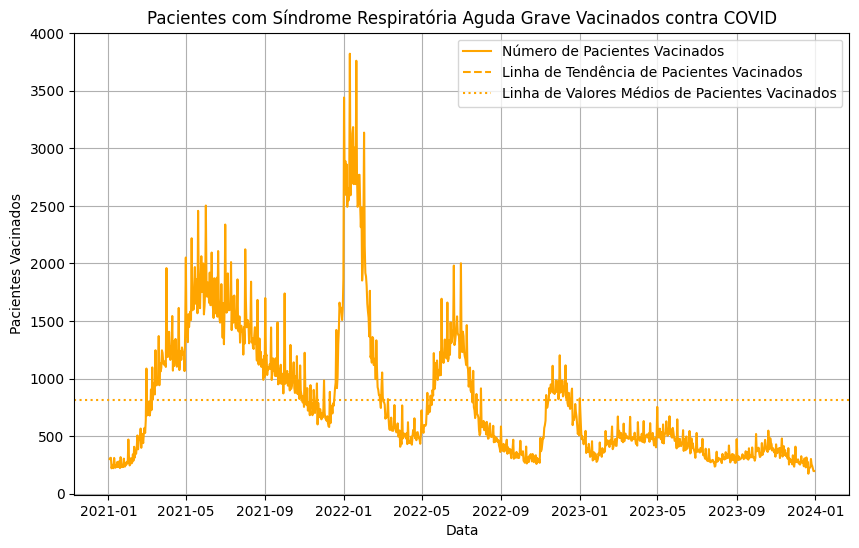

In [ ]:
# Plotar o gráfico de pacientes vacinados

plt.figure(figsize=(10,6))

plt.plot(df_hist['Data'], df_hist['Num_Vacinados'], label='Número de Pacientes Vacinados', color='orange')

# Calcular a linha de tendência para pacientes vacinados

x = np.arange(len(df_hist))
y = df_hist['Num_Vacinados']
m, b = np.polyfit(x, y, 1)
plt.plot(df_hist['Data'], m*x + b, linestyle='--', color='orange', label='Linha de Tendência de Pacientes Vacinados')

# Calcular a linha de média dos pacientes vacinados

plt.axhline(y=df_hist['Num_Vacinados'].mean(), color='orange', linestyle=':', label='Linha de Valores Médios de Pacientes Vacinados')

plt.xlabel('Data')
plt.ylabel('Pacientes Vacinados')
plt.title('Pacientes com Síndrome Respiratória Aguda Grave Vacinados contra COVID')
plt.legend()
plt.grid(True)
plt.show()

# **Discussão e Conclusões**

*Os ativos da bolsa brasileira da Gol diminuiram drasticamente no início da pandemia, como esperado.
Nos meses seguintes, os ativos ficaram relativamente baixos, mas aumentando regularmente até atingir o valor original de antes da pandemia.
Estranhamente, o valor de tais diminuiu com o fim de cada etapa da quarentena, algo que persistiu pelos próximos dois anos até valerem quase nada.
O caso mais provável é que a empresa de linhas aéreas se endividou durante o início das medidas restritivas, e mesmo com a reabertura de seu comércio, o lucro com seus clientes não foi o suficiente para pagá-las.
Parece existir uma correlação sobre a quantidade de casos novos e óbitos por Covid, mas não deve ser confundida por causa e efeito.
É difícil acreditar que uma empresa que transporta seus clientes lucraria com danos causados a eles.*

*O oposto aconteceu com a LOG-IN, pela maior parte.
Os ativos dela cairam menos do que os da Gol durante a pandemia, porém ficaram estáveis quando ela persistiu.
Como ela é uma empresa de tecnologia, faz sentido dela crescer e obter oportunidades no mercado quando sua tecnologia e serviços a utilizando estava em tão alta demanda devido a quarentena.
Mesmo com os danos que Covid causou a economia, seu crescimento impediu grandes danos a LOG-IN
Além disso, quando tal período terminou, o preço dos ativos aumentaram consistentemente.
Há boa probabilidade que a empresa prometeu a investidores o mesmo crescimento depois da pandemia terminar, uma promessa que pode manter devido a atenção dobrada entre 2020 e 2022.
Com uma relação inversamente proporcional aos casos de óbitos de Covid, o quão mais eles diminuiram, o quão mais os ativos cresceram.*

*Quanto a correlação dos ativos com os pacientes com síndrome respiratória aguda grave, uma explicação já é pelo menos um pouco fácil.
A quantidade de pessoas vacinadas na segunda metade de 2021 parece ter afetado ambas empresas, como houve um pequeno pico para ambas durante esse período, portanto o aumento da vacinação e o decrescimento de casos novos parece ter afetado-as positivamente.
A Gol especialmente teve seu último pico mais positivo durante o mesmo período.
No outro lado, o pico de casos justamente depois do início de 2022 não parece ter afetado os ativos nem um pouco. Ou, se afetou, perturbou apenas a Gol.
Assim, é possível ver que a vacinação geral em 2021 levou ao final de uma etapa de quarentena, aumentando o valor dos ativos.
Porém, devido as festas de final de ano sem cuidado, houve tanta propagação do vírus que até as pessoas vacinadas foram infectadas em números enormes.
Mas mesmo com esse pico de casos, a quarentena não voltou uma etapa, portanto as empresas não foram afetadas em grande parte.*